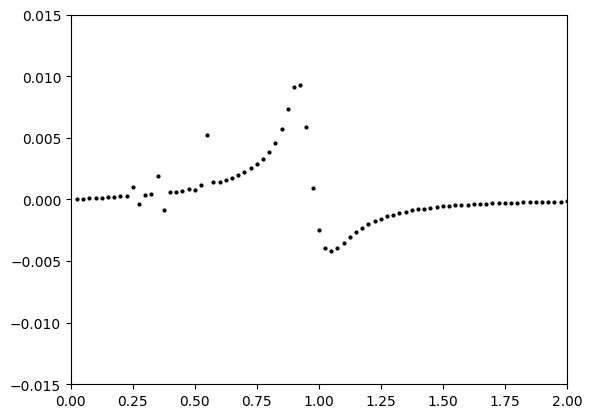

In [1]:
import matplotlib.pyplot as mpl
import numpy

N = 150
eta = []
H = numpy.zeros((N,N))

for t_1 in numpy.linspace(0.0, 2.025, num = 82, endpoint = True):
    num = 0.0
    den = 0.5*N*(N-1)
    eigval = []
    eigvec_array = []
    for i in range (0, N-1):
        if(i % 2 == 0):
            H[i,i+1] = t_1 #t_1
            H[i+1,i] = t_1 #t_1
        elif(i % 2 == 1 and i < N-1):
            H[i,i+1] = 0.9 #t_2+g
            H[i+1,i] = 1.1 #t_2-g
    eigval, eigvec_array = numpy.linalg.eig(H)
    eigvec = numpy.transpose(eigvec_array)

    for m in range (1,N):
        for n in range (0,m):
            num = num + (abs(numpy.inner(numpy.conj(eigvec[n]),eigvec[m]))**2)
            #den = den + (abs(numpy.inner(numpy.conj(eigvec[n]),eigvec[n]))*abs(numpy.inner(numpy.conj(eigvec[m]),eigvec[m])))       
    eta.append(num/den)
t1_val = numpy.linspace(0.0, 2, num = 81, endpoint = True)
eta_val = []
for k in range (0,81):
    eta_val.append((eta[k+1] - eta[k])/0.025)
mpl.plot(t1_val, eta_val, 'o', markersize = '2', color = 'black')
mpl.xlim(0,2.0)
mpl.ylim(-0.015,0.015)
mpl.show()
